In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load Dataset
df = pd.read_csv("human_vital_signs_dataset_2024.csv")

In [3]:
#Preview Data
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Patient ID  Heart Rate  Respiratory Rate                   Timestamp  \
0           1          60                12  2024-07-19 21:53:45.729841   
1           2          63                18  2024-07-19 21:52:45.729841   
2           3          63                15  2024-07-19 21:51:45.729841   
3           4          99                16  2024-07-19 21:50:45.729841   
4           5          69                16  2024-07-19 21:49:45.729841   

   Body Temperature  Oxygen Saturation  Systolic Blood Pressure  \
0         36.861707          95.702046                      124   
1         36.511633          96.689413                      126   
2         37.052049          98.508265                      131   
3         36.654748          95.011801                      118   
4         36.975098          98.623792                      138   

   Diastolic Blood Pressure  Age  Gender  Weight (kg)  Height (m)  \
0                        86   37  Female    91.541618    1.6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  int64  
 2   Respiratory Rate          200020 non-null  int64  
 3   Timestamp                 200020 non-null  object 
 4   Body Temperature          200020 non-null  float64
 5   Oxygen Saturation         200020 non-null  float64
 6   Systolic Blood Pressure   200020 non-null  int64  
 7   Diastolic Blood Pressure  200020 non-null  int64  
 8   Age                       200020 non-null  int64  
 9   Gender                    200020 non-null  object 
 10  Weight (kg)               200020 non-null  float64
 11  Height (m)                200020 non-null  float64
 12  Derived_HRV               200020 non-null  float64
 13  Derived_Pulse_Pressure    200020 non-null  i

In [5]:
 #Check for Nulls
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64

In [6]:
#Summary Statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,100010.500000,79.533747,15.489451,36.748353,97.504372,124.437971,79.499625,53.446275,74.996419,1.750031,0.099970,44.938346,25.003625,94.479074
std,57740.944759,11.552894,2.294472,0.433290,1.442598,8.656946,5.757248,20.786802,14.471502,0.144554,0.028861,10.404945,6.447143,4.797891
min,1.000000,60.000000,12.000000,36.000004,95.000007,110.000000,70.000000,18.000000,50.000156,1.500001,0.050000,21.000000,12.505974,83.333333
25%,50005.750000,70.000000,13.000000,36.372613,96.256859,117.000000,75.000000,35.000000,62.423615,1.624777,0.074955,37.000000,20.134367,91.000000
50%,100010.500000,80.000000,15.000000,36.747741,97.509629,124.000000,79.000000,53.000000,74.977169,1.750478,0.099988,45.000000,24.320776,94.333333
75%,150015.250000,90.000000,17.000000,37.123003,98.755722,132.000000,84.000000,71.000000,87.539510,1.875310,0.124917,53.000000,29.187169,98.000000
max,200020.000000,99.000000,19.000000,37.499992,99.999963,139.000000,89.000000,89.000000,99.999765,1.999997,0.149999,69.000000,44.376487,105.666667


C:\Users\Admin\AppData\Local\Temp\ipykernel_37384\1344224350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Risk Category', palette='Set2')


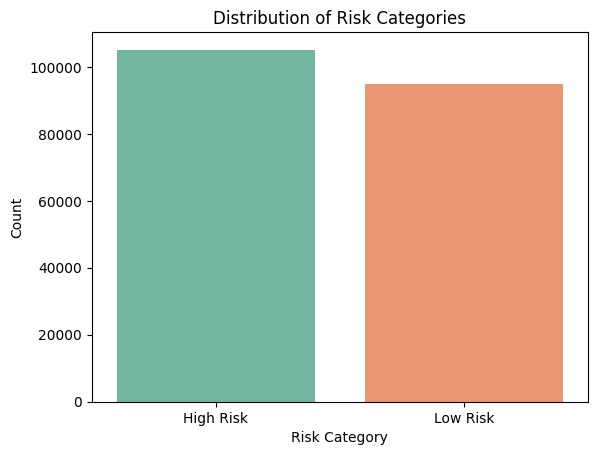

In [7]:

# Distribution of Risk Category
sns.countplot(data=df, x='Risk Category', palette='Set2')
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()


In [13]:
# Drop non-numeric or non-relevant columns
df_cleaned = df.drop(columns=["Patient ID", "Timestamp",])

In [14]:
#encode categorical columns
from sklearn.preprocessing import LabelEncoder


In [10]:
 #Encode categorical columns
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Risk Category"] = LabelEncoder().fit_transform(df["Risk Category"]) 

In [15]:
# Train-test split
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=["Risk Category"])
y = df_cleaned["Risk Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[20949     0]
 [    0 19055]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20949
           1       1.00      1.00      1.00     19055

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004



In [17]:
import matplotlib.pyplot as plt


In [18]:

# Get feature importances from the model
importances = model.feature_importances_
features = X.columns

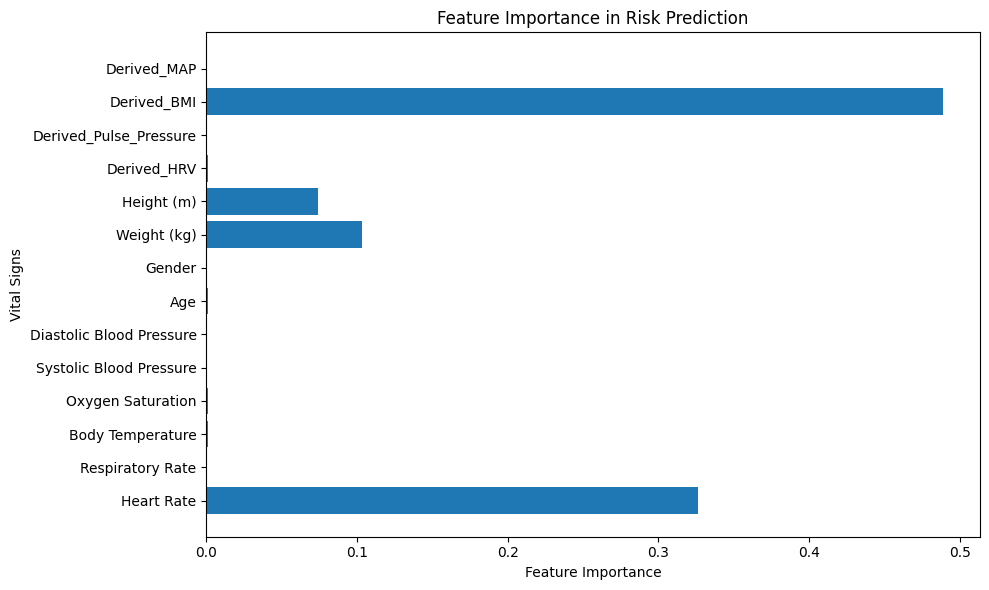

In [19]:

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Vital Signs")
plt.title("Feature Importance in Risk Prediction")
plt.tight_layout()
plt.show()


In [21]:
import pickle

# Save model to a file
with open("VITAL_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [20]:
# Save predictions
predictions_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
predictions_df.to_csv("model_predictions.csv", index=False)
print("Model predictions saved to 'model_predictions.csv'.")

Model predictions saved to 'model_predictions.csv'.
